# Data Science and Business Anaytics Internship

# The Sparks foundation : #GRIPJUNE21

Author: Kiran Chhamain

# Task 3: Exploratory Data Analysis: Retail Superstore

Problem:  As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?

Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data. EDA is generally classified into two methods, i.e. graphical analysis and non-graphical analysis.
EDA is very essential because it is a good practice to first understand the problem statement and the various relationships between the data features.

Dataset: https://bit.ly/3i4rbWl

In [1]:
import pandas as pd                                         #importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
import sklearn
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
stores=pd.read_csv("E:\python\Spark_foundations\SampleSuperstore.csv")        #importing the dataset

data prepration and preprocessing 

In [3]:
stores.head()         #first 5 observations of dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
stores.tail()      #last 5 observation of dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
stores.nunique()      #unique values in dataset store

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
stores.columns            #nos. of column in dataset

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
stores['Ship Mode'].unique()                 #values of Ship Mode

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
stores['Segment'].unique()                  #values of segment

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
stores['Country'].unique()                   #Country

array(['United States'], dtype=object)

In [10]:
stores['City'].unique()                  #Cities in country

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [11]:
stores['State'].unique()                     #States in country

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [12]:
stores['Postal Code'].unique()              #postal code of cities

array([42420, 90036, 33311, 90032, 28027, 98103, 76106, 53711, 84084,
       94109, 68025, 19140, 84057, 90049, 77095, 75080, 77041, 60540,
       32935, 55122, 48185, 19901, 47150, 10024, 12180, 90004, 60610,
       85234, 22153, 10009, 49201, 38109, 77070, 35601, 94122, 27707,
       60623, 29203, 55901, 55407, 97206, 55106, 80013, 28205, 60462,
       10035, 50322, 43229, 37620, 19805, 61701, 85023, 95661, 64055,
       91104, 43055, 53132, 85254, 95123, 98105, 98115, 73034, 90045,
       19134, 88220, 78207, 77036, 62521, 71203,  6824, 75051, 92374,
       45011,  7090, 19120, 44312, 80219, 75220, 37064, 90604, 48601,
       44256, 43017, 48227, 38401, 33614, 95051, 55044, 92037, 77506,
       94513, 27514,  7960, 45231, 94110, 90301, 33319, 80906,  7109,
       48180,  8701, 22204, 80004,  7601, 33710, 19143, 90805, 92345,
       37130, 84041, 78745,  1852, 31907,  6040, 78550, 85705, 62301,
        2038, 33024, 98198, 61604, 89115,  2886, 33180, 28403, 92646,
       40475, 80027,

In [13]:
stores['Region'].unique()                      #regions in country

array(['South', 'West', 'Central', 'East'], dtype=object)

In [14]:
stores['Sub-Category'].unique()                 #subcategory of products

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [15]:
stores['Category'].unique()                       #category of products

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
stores['Sales'].unique()

array([261.96 , 731.94 ,  14.62 , ..., 437.472,  97.98 , 243.16 ])

In [17]:
stores['Sales'].mean()                  #mean of sales

229.8580008304938

In [18]:
stores['Sales'].mode()               #mode of sales

0    12.96
dtype: float64

In [19]:
stores['Quantity'].unique()          #quantity

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

In [20]:
stores['Quantity'].mean()             #mean of quantity saled

3.789573744246548

In [21]:
stores['Quantity'].mode()

0    3
dtype: int64

In [22]:
stores['Profit'].unique()            

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

In [23]:
stores['Profit'].mean()               #mean of profit

28.656896307784802

In [24]:
stores['Discount'].unique()              

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [25]:
stores['Discount'].mean()                  #mean of discount

0.15620272163298934

In [26]:
stores.value_counts()                     #valuecounts of dataset

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288      2
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370      2
Standard Class  Consumer     United States  San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780      2
                                            Los Angeles    California  90036        West     Office Supplies  Paper         19.440   3         0.0        9.3312      2
Same Day        Home Office  United States  San Francisco  California  94122        West     Office Supplies  Labels        41.400   4         0.0        19.8720    

In [27]:
stores.isnull()            #checking missing values,if any

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
stores.isnull().sum()                 #sum of missing values,if any

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [29]:
stores.info()           #info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [30]:
stores.describe()        # summary statistics

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [31]:
stores.shape                   #shape of datset

(9994, 13)

In [32]:
print("Columns: ", len(stores.columns))

Columns:  13


In [33]:
print("Rows: ", len(stores))

Rows:  9994


In [34]:
stores.groupby('Profit').sum()['Sales']                    #profit vs sales

Profit
-6599.9780     4499.985
-3839.9904     7999.980
-3701.8928     2177.584
-3399.9800     2549.985
-2929.4845     1889.990
                ...    
 4630.4755     9449.950
 4946.3700     9892.740
 5039.9856    10499.970
 6719.9808    13999.960
 8399.9760    17499.950
Name: Sales, Length: 7287, dtype: float64

In [35]:
stores.groupby('Discount').sum()['Sales']                 #Discounts vs sales

Discount
0.00    1.087908e+06
0.10    5.436935e+04
0.15    2.755852e+04
0.20    7.645944e+05
0.30    1.032267e+05
0.32    1.449346e+04
0.40    1.164178e+05
0.45    5.484974e+03
0.50    5.891854e+04
0.60    6.644700e+03
0.70    4.062028e+04
0.80    1.696376e+04
Name: Sales, dtype: float64

In [36]:
stores.groupby('Quantity').sum()['Sales']                  #quantity vs sales

Quantity
1      53251.9345
2     289091.4798
3     422060.6007
4     323670.9944
5     415661.6965
6     207122.3214
7     239908.3659
8     117760.1760
9     128505.5901
10     24056.6640
11     15772.4820
12     14868.4080
13     32338.1890
14     13131.9580
Name: Sales, dtype: float64

In [37]:
stores.groupby('Ship Mode').sum()['Sales']                  #shipping mode used to sell the products

Ship Mode
First Class       3.514284e+05
Same Day          1.283631e+05
Second Class      4.591936e+05
Standard Class    1.358216e+06
Name: Sales, dtype: float64

In [38]:
stores.groupby('Category').sum()['Sales']                     #Category of items suppied for sales

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [39]:
stores.groupby('Postal Code').sum()['Sales']

Postal Code
1040      301.960
1453      217.490
1752      206.640
1810      435.850
1841     6109.062
           ...   
98502    1020.448
98632     119.210
98661     686.836
99207    2027.918
99301    2201.112
Name: Sales, Length: 631, dtype: float64

In [40]:
stores.groupby('Region').sum()['Sales']                    #regions vs sales

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [41]:
stores.groupby('City').sum()['Sales']                         #city vs sales

City
Aberdeen         25.500
Abilene           1.392
Akron          2729.986
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Sales, Length: 531, dtype: float64

In [42]:
stores.groupby('State').sum()['Sales']

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

Vizualization of variables


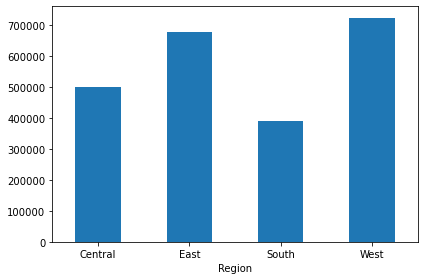

In [43]:
stores.groupby('Region').sum()['Sales'].plot.bar()            
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

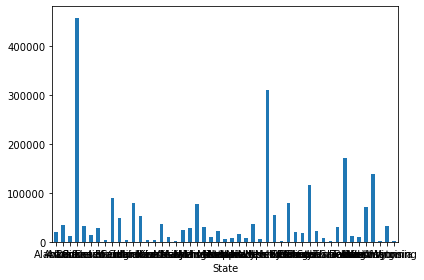

In [44]:
stores.groupby('State').sum()['Sales'].plot.bar()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

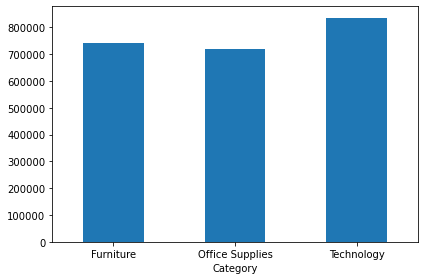

In [45]:
stores.groupby('Category').sum()['Sales'].plot.bar()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

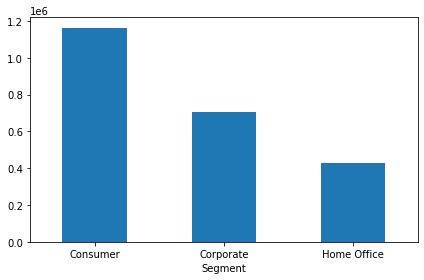

In [46]:
stores.groupby('Segment').sum()['Sales'].plot.bar()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

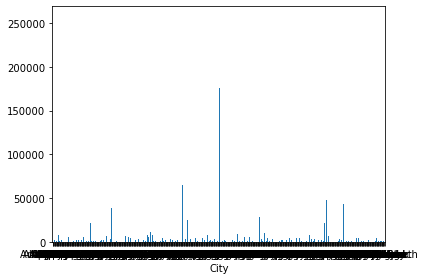

In [47]:
stores.groupby('City').sum()['Sales'].plot.bar()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

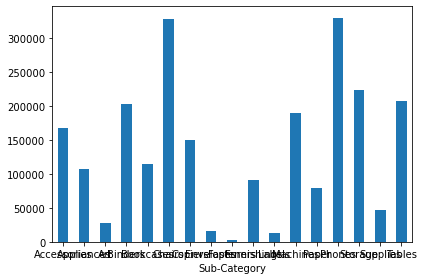

In [48]:
stores.groupby('Sub-Category').sum()['Sales'].plot.bar()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

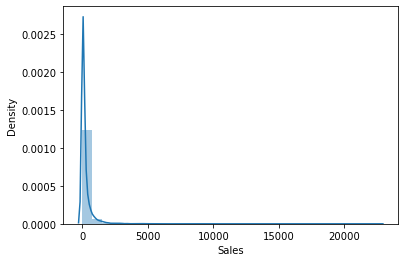

In [49]:
sns.distplot(stores["Sales"],bins=30)                          #distribution plot of sales

<AxesSubplot:xlabel='Discount', ylabel='Density'>

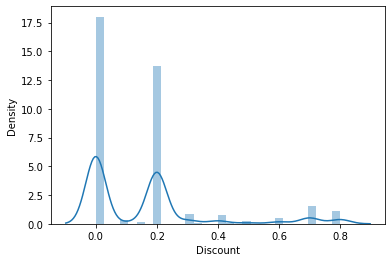

In [50]:
sns.distplot(stores["Discount"],bins=30)             #distribution of Discount

<AxesSubplot:xlabel='Profit', ylabel='Density'>

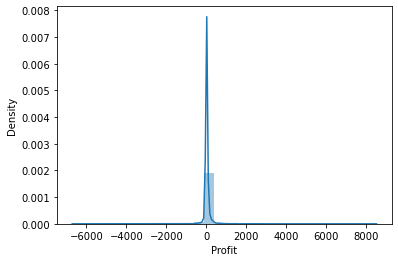

In [51]:
sns.distplot(stores["Profit"],bins=30)                       #distribution of profit

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

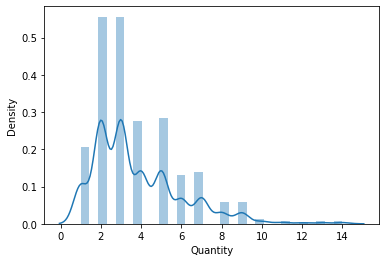

In [52]:
sns.distplot(stores["Quantity"],bins=30)                 

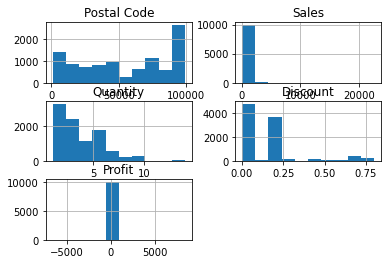

In [53]:
stores.hist()                                #histplot
plt.show()

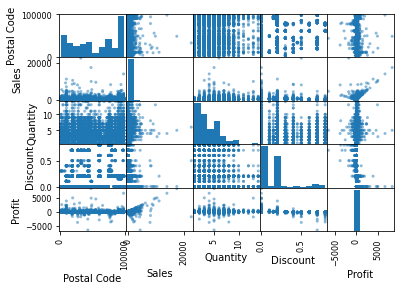

<Figure size 576x720 with 0 Axes>

In [54]:
scatter_matrix(stores)                         #scatter plot
plt.figure(figsize=(8,10))
plt.show()

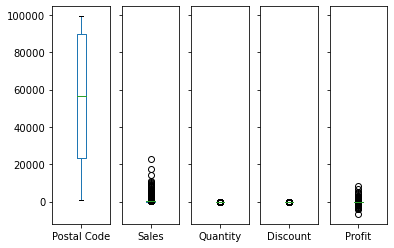

In [55]:
stores.plot(kind = 'box', subplots='True', sharex= 'False', sharey='False')                #dendogram
plt.show()

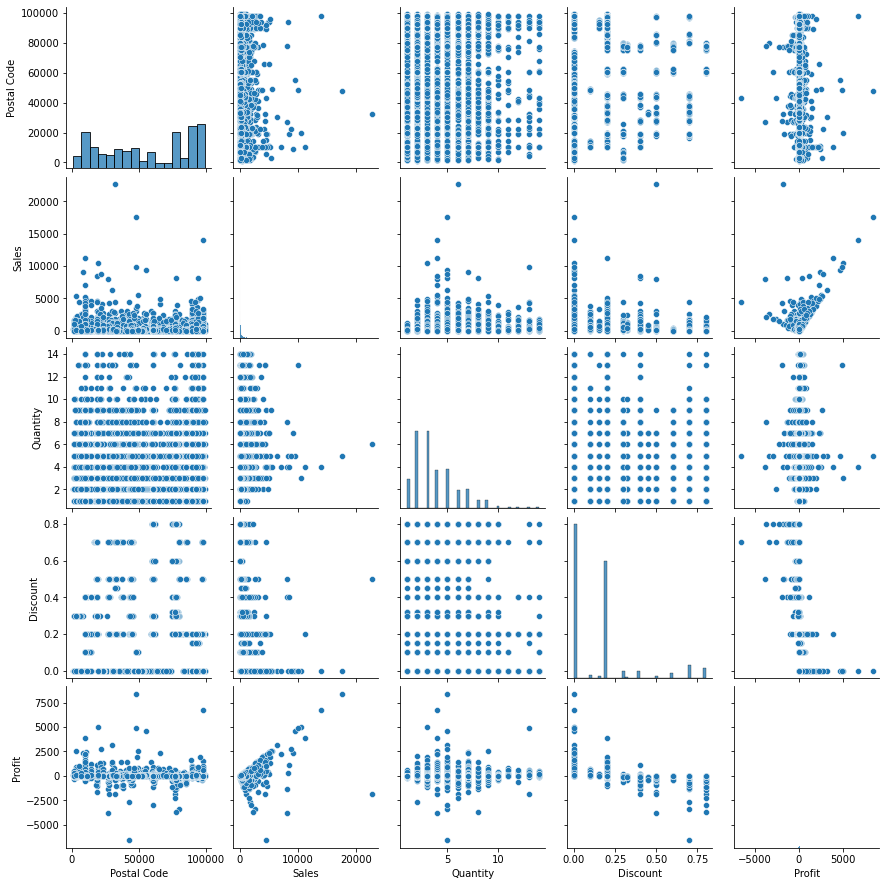

In [56]:
sns.pairplot(stores)                           #pairplot of variables

Profile Report using pandas profile feature: This gives us a detailed picture of EDA all together. 

In [57]:
profile = ProfileReport(stores, title="Sale Superstore", explorative=True)
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Top 15 Cities which generated Highest Sales:

In [58]:
city = stores.groupby("City").sum().sort_values("Sales", ascending = False).head(15)
city = city[["Sales"]].round(2)
city.reset_index(inplace = True)
city

,City,Sales
0,New York City,256368.16
1,Los Angeles,175851.34
2,Seattle,119540.74
3,San Francisco,112669.09
4,Philadelphia,109077.01
5,Houston,64504.76
6,Chicago,48539.54
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Springfield,43054.34


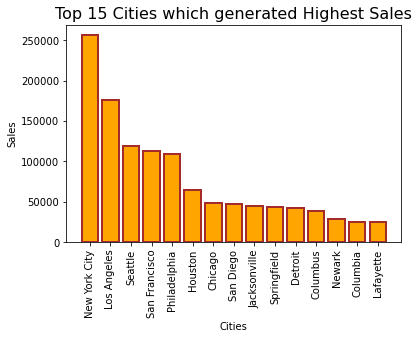

<Figure size 720x432 with 0 Axes>

In [59]:
plt.title("Top 15 Cities which generated Highest Sales", fontsize=16)
plt.bar(city["City"], city["Sales"],color= 'Orange',edgecolor='brown', linewidth = 2)
plt.xlabel("Cities",fontsize=10)  
plt.ylabel("Sales",fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.figure(figsize = (10,6)) 
plt.show()

Segnent vs sales:

In [60]:
segment = stores.groupby("Segment").sum()
segment = segment[["Sales"]]
segment.reset_index(inplace = True)
segment

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


Total Revenue generated segments wise:

In [61]:
total_revenue = segment["Sales"].sum() 
total_revenue = str(int(total_revenue))
total_revenue = "$" + total_revenue
total_revenue # this is our total revenue

'$2297200'

The Total Revenue generated by all the shipping modes - $2297200

Sales based on segment:

In [62]:
# The function which helps us to annotate the values in our donut or pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return  "${v:d}".format(p=pct,v=val)
    return my_autopct

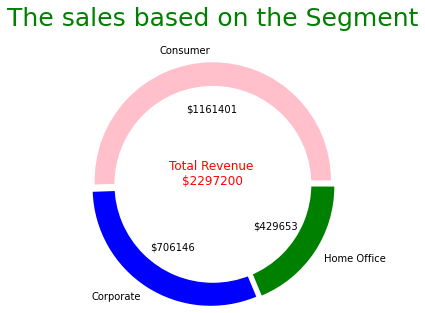

In [63]:
# Creating a donut chart.
center = [5]
plt.pie(segment['Sales'], labels = segment['Segment'],colors =['Pink','Blue','Green'], 
        radius = 1.5, explode = [0.05,0.05,0.05], autopct = make_autopct(segment["Sales"]))
plt.pie(center, radius = 1.25, colors = "white")
label = plt.annotate('Total Revenue \n' + total_revenue, color = 'red', xy=(0, 0)
                     ,fontsize=12, ha="center")
plt.tight_layout()
plt.title("The sales based on the Segment", pad = 60, size = 25, color = "green")
plt.show()

Consumer segment generated the higher revenue: $1161401

Sales based on shipmode:

In [64]:
shipmode = stores.groupby("Ship Mode").sum()

shipmode = shipmode[["Sales"]]

shipmode.reset_index(inplace = True)

shipmode

,Ship Mode,Sales
0,First Class,3.514284e+05
1,Same Day,1.283631e+05
2,Second Class,4.591936e+05
3,Standard Class,1.358216e+06


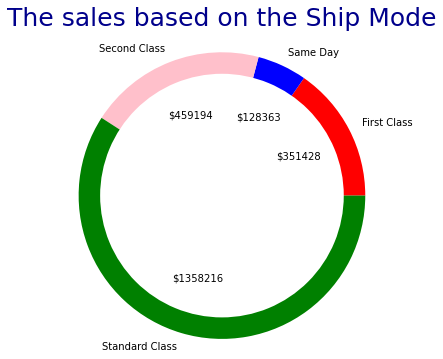

In [65]:
#Donut Chart
center = [6]
plt.figure(figsize = (6,6))
plt.pie(shipmode['Sales'], labels = shipmode['Ship Mode'],colors = ['Red','Blue','Pink',"Green"], 
        radius = 2, autopct= make_autopct(shipmode["Sales"]))
plt.pie(center, radius = 1.7, colors = "white")
plt.title("The sales based on the Ship Mode", pad = 80, size = 25, color = "darkblue")
plt.tight_layout()
plt.show()

Standard class generated: $1358216

Sales based on sub-category:

In [66]:
subcat = stores.groupby("Sub-Category").sum().sort_values("Sales" , ascending = False).head()
subcat = subcat[["Sales"]].round(2)
subcat.reset_index(inplace = True)
subcat

,Sub-Category,Sales
0,Phones,330007.05
1,Chairs,328449.10
2,Storage,223843.61
3,Tables,206965.53
4,Binders,203412.73


Phones under subcategory generated the higher sales value: $330007.05

Sales based on Stores:

In [67]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [68]:
state = pd.DataFrame(state, state_code) 
state.reset_index(inplace=True)
state.columns = ['State Code','State']
state.head()

,State Code,State
0,AL,Alabama
1,AZ,Arizona
2,AR,Arkansas
3,CA,California
4,CO,Colorado


In [69]:
sales = stores.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(inplace=True) 
sales.drop('Postal Code',axis = 1, inplace = True)
sales.head(5)

,State,Sales,Quantity,Discount,Profit
0,California,457687.6315,7667,145.60,76381.3871
1,New York,310876.2710,4224,62.40,74038.5486
2,Texas,170188.0458,3724,364.64,-25729.3563
3,Washington,138641.2700,1883,32.40,33402.6517
4,Pennsylvania,116511.9140,2153,192.90,-15559.9603


In [70]:
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.head()

,index,State,Sales,Quantity,Discount,Profit
0,26,Alabama,19510.6400,256,0.0,5786.8253
1,15,Arizona,35282.0010,862,68.0,-3427.9246
2,30,Arkansas,11678.1300,240,0.0,4008.6871
3,0,California,457687.6315,7667,145.6,76381.3871
4,17,Colorado,32108.1180,693,57.6,-6527.8579


California under State generated the maximum profit: $76381,  
with given discount: $145.6

Correlation matrix among the variables:

In [71]:
corelation= stores.corr()

<AxesSubplot:>

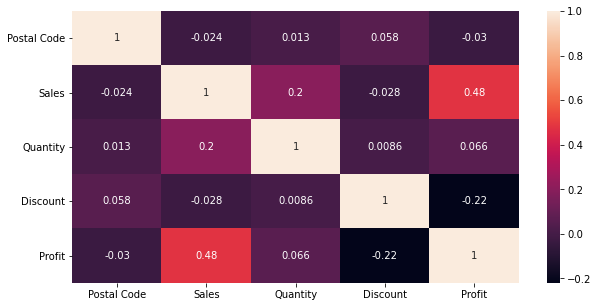

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

By plotting a correlation matrix, we get a overview of how the features are related to one another